In [2]:
torch.cuda.empty_cache()


In [2]:
pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [4]:
pip install sacrebleu sacremoses

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 20.8 MB/s eta 0:00:00


Utilisation du dispositif : cpu
Utilisation du dispositif : cpu

Début de l'entraînement...
Taille du jeu de données d'entraînement : 16
Taille du jeu de données de validation : 2
Époque 0 : Perte d'entraînement = 13.2876, Perte de validation = 11.5979
Époque 1 : Perte d'entraînement = 11.3508, Perte de validation = 8.2057
Époque 2 : Perte d'entraînement = 8.9660, Perte de validation = 6.5258
Époque 3 : Perte d'entraînement = 7.4084, Perte de validation = 4.7997
Époque 4 : Perte d'entraînement = 6.1533, Perte de validation = 3.2369
Époque 5 : Perte d'entraînement = 4.1614, Perte de validation = 1.9411
Époque 6 : Perte d'entraînement = 2.7821, Perte de validation = 1.1026
Époque 7 : Perte d'entraînement = 2.2699, Perte de validation = 0.8968
Époque 8 : Perte d'entraînement = 2.0266, Perte de validation = 0.8841
Époque 9 : Perte d'entraînement = 1.6809, Perte de validation = 0.8887


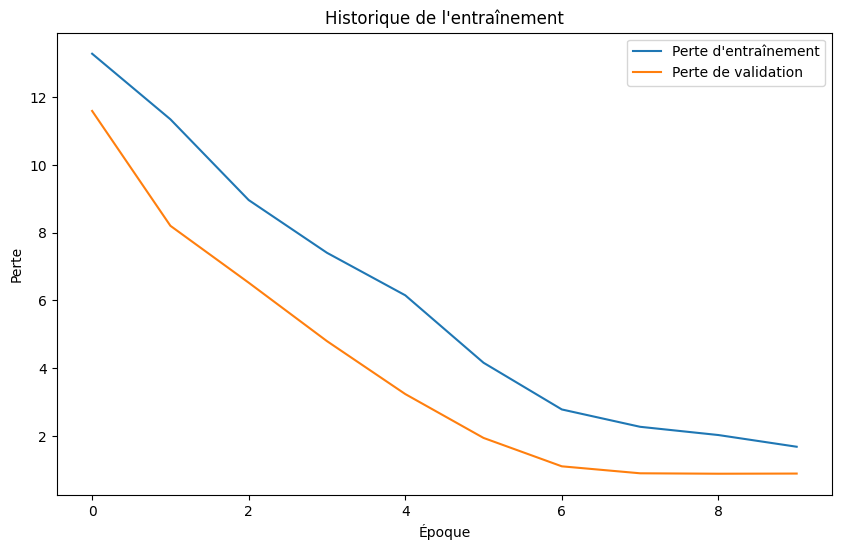


Évaluation du modèle...
  - Texte original: La géopolitique des ressources énergétiques renouvelables redéfinit les dynamiques de pouvoir et d'influence sur la scène internationale.
  - Texte simplifié: La géopolitique des ressources énergétiques renouvelables redefinit les dynamiques de pouvoir et d'influence sur la scène internationale.
  - Texte de référence: Les pays qui maîtrisent les énergies propres ont plus de pouvoir.
  - Score SARI: 37.7083
****************
  - Texte original: Le changement climatique provoque des transformations profondes dans les écosystèmes, affectant la distribution et la survie de nombreuses espèces animales et végétales.
  - Texte simplifié: Le changement climatique provoque des transformations profondes dans les écosystèmes, affectant la distribution et la survie de diverses espèces animales, entraînant des changements climatiques.
  - Texte de référence: Le réchauffement change la vie des animaux et des plantes sur Terre.
  - Score SARI: 33.6168
****

In [5]:
"""
Module de simplification de texte utilisant l'apprentissage profond.

Ce script implémente un modèle de simplification de texte basé sur T5,
qui transforme des textes complexes en versions plus simples et accessibles.

Principales fonctionnalités:
- Chargement et prétraitement des données
- Entraînement d'un modèle de simplification
- Évaluation avec des métriques spécifiques (SARI)
- Génération de textes simplifiés

Dépendances:
- torch
- transformers
- nltk
- evaluate


"""

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
from typing import List, Dict
import numpy as np
import matplotlib.pyplot as plt
import json
import gc
from evaluate import load

class SimplificationDataset(Dataset):
    """
    Jeu de données personnalisé pour l'entraînement du modèle de simplification.

    Gère le prétraitement et la tokenisation des textes complexes et simplifiés.

    Attributs:
        tokenizer: Tokenizer pour convertir le texte en tokens
        data: Liste des exemples de textes
        max_length: Longueur maximale des séquences
    """
    def __init__(self, data: List[Dict], tokenizer, max_length: int = 64):
        """
        Initialise le jeu de données de simplification.

        Args:
            data (List[Dict]): Liste des exemples de textes
            tokenizer: Tokenizer pour encoder les textes
            max_length (int, optional): Longueur maximale des séquences. Défaut à 64.
        """
        self.tokenizer = tokenizer
        self.data = data
        self.max_length = max_length

        # Validation de base du jeu de données
        if not self.data:
            print("ATTENTION : Jeu de données vide fourni !")

    def __len__(self):
        """
        Retourne le nombre total d'exemples dans le jeu de données.

        Returns:
            int: Nombre d'exemples
        """
        return len(self.data)

    def __getitem__(self, idx):
        """
        Récupère et prépare un exemple spécifique.

        Args:
            idx (int): Index de l'exemple à récupérer

        Returns:
            Dict: Dictionnaire avec les tokens d'entrée, masque d'attention et labels
        """
        try:
            # Récupération de l'exemple
            item = self.data[idx]

            # Encodage du texte complexe
            encoding = self.tokenizer(
                item["complex"],
                padding="max_length",
                truncation=True,
                max_length=self.max_length,
                return_tensors="pt"
            )

            # Encodage du texte simplifié (labels)
            target_encoding = self.tokenizer(
                item["simple"],
                padding="max_length",
                truncation=True,
                max_length=self.max_length,
                return_tensors="pt"
            )

            return {
                'input_ids': encoding['input_ids'].squeeze(),
                'attention_mask': encoding['attention_mask'].squeeze(),
                'labels': target_encoding['input_ids'].squeeze()
            }
        except Exception as e:
            print(f"Erreur lors du traitement de l'élément {idx}: {e}")
            raise e

class TextSimplifier:
    """
    Classe pour simplifier des textes complexes en utilisant un modèle de langage basé sur T5.

    Attributs:
        model_name: Nom du modèle de langage à utiliser
        device: Dispositif pour l'exécution du modèle (par défaut, utilise CUDA si disponible)
    """
    def __init__(self, model_name: str = "t5-small", device=None):
        """
        Initialise le modèle de simplification de texte.

        Args:
            model_name (str, optional): Nom du modèle de langage à utiliser. Défaut à "t5-small".
            device (optional): Dispositif pour l'exécution du modèle. Défaut à CUDA si disponible, sinon CPU.
        """
        if device is None:
            device = "cuda" if torch.cuda.is_available() else "cpu"

        self.device = torch.device(device)
        print(f"Utilisation du dispositif : {self.device}")

        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        self.model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

        # Activation des optimisations de mémoire
        self.model.gradient_checkpointing_enable()

        if self.device.type == "cuda":
            self.model = self.model.half()

        self.model.to(self.device)

        # Historique de l'entraînement
        self.train_losses = []
        self.val_losses = []

        # Paramètres de génération
        self.gen_params = {
            "max_length": 64,
            "temperature": 0.7,
            "top_p": 0.9,
            "num_beams": 4,
            "no_repeat_ngram_size": 3,
            "early_stopping": True
        }

    def train_model(self, train_data: List[Dict], val_data: List[Dict] = None,
                   epochs: int = 3, batch_size: int = 8, learning_rate: float = 2e-5,
                   accumulation_steps: int = 4):
        """
        Entraîne le modèle de simplification de texte.

        Args:
            train_data (List[Dict]): Données d'entraînement
            val_data (List[Dict], optional): Données de validation. Défaut à None.
            epochs (int, optional): Nombre d'époques d'entraînement. Défaut à 3.
            batch_size (int, optional): Taille des lots d'entraînement. Défaut à 8.
            learning_rate (float, optional): Taux d'apprentissage. Défaut à 2e-5.
            accumulation_steps (int, optional): Nombre d'étapes d'accumulation. Défaut à 4.
        """

        # Validation des données d'entraînement
        if not train_data:
            raise ValueError("Les données d'entraînement ne peuvent pas être vides !")

        train_dataset = SimplificationDataset(train_data, self.tokenizer)
        print(f"Taille du jeu de données d'entraînement : {len(train_dataset)}")

        train_loader = DataLoader(
            train_dataset,
            batch_size=batch_size,
            shuffle=True,
            drop_last=False,
            num_workers=0
        )

        if val_data:
            val_dataset = SimplificationDataset(val_data, self.tokenizer)
            print(f"Taille du jeu de données de validation : {len(val_dataset)}")
            val_loader = DataLoader(
                val_dataset,
                batch_size=batch_size,
                shuffle=False,
                drop_last=False,
                num_workers=0
            )
        else:
            val_loader = None
            print("Aucune donnée de validation fournie !")

        optimizer = torch.optim.AdamW(
            self.model.parameters(),
            lr=learning_rate,
            weight_decay=0.01,
            eps=1e-8,
            betas=(0.9, 0.999)
        )

        scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
            optimizer,
            mode='min',
            factor=0.5,
            patience=3,
            verbose=True
        )

        for epoch in range(epochs):
            self.model.train()
            total_train_loss = 0
            train_batches = 0
            optimizer.zero_grad()

            epoch_losses = []

            for batch_idx, batch in enumerate(train_loader):
                try:
                    if torch.cuda.is_available():
                        torch.cuda.empty_cache()

                    batch = {k: v.to(self.device) for k, v in batch.items()}
                    outputs = self.model(**batch)

                    loss = outputs.loss / accumulation_steps
                    total_train_loss += loss.item() * accumulation_steps
                    train_batches += 1

                    epoch_losses.append(loss.item() * accumulation_steps)

                    loss.backward()

                    if (batch_idx + 1) % accumulation_steps == 0:
                        torch.nn.utils.clip_grad_norm_(self.model.parameters(), max_norm=1.0)
                        optimizer.step()
                        optimizer.zero_grad()

                    del outputs, loss, batch
                    gc.collect()
                    if torch.cuda.is_available():
                        torch.cuda.empty_cache()

                except RuntimeError as e:
                    if "out of memory" in str(e):
                        print(f"ATTENTION : Erreur de mémoire à l'étape {batch_idx}. Tentative de récupération...")
                        if 'outputs' in locals(): del outputs
                        if 'loss' in locals(): del loss
                        if 'batch' in locals(): del batch
                        gc.collect()
                        if torch.cuda.is_available():
                            torch.cuda.empty_cache()
                        continue
                    else:
                        raise e

            # Assure une mise à jour finale des gradients si nécessaire
            if train_batches % accumulation_steps != 0:
                torch.nn.utils.clip_grad_norm_(self.model.parameters(), max_norm=1.0)
                optimizer.step()
                optimizer.zero_grad()

            avg_train_loss = total_train_loss / train_batches if train_batches > 0 else 0
            self.train_losses.append(avg_train_loss)

            # Phase de validation
            if val_data and val_loader:
                self.model.eval()
                total_val_loss = 0
                val_batches = 0
                val_losses = []

                with torch.no_grad():
                    for val_batch in val_loader:
                        val_batch = {k: v.to(self.device) for k, v in val_batch.items()}
                        val_outputs = self.model(**val_batch)
                        val_loss = val_outputs.loss.item()
                        total_val_loss += val_loss
                        val_batches += 1
                        val_losses.append(val_loss)

                avg_val_loss = total_val_loss / val_batches if val_batches > 0 else 0
                self.val_losses.append(avg_val_loss)

                print(f"Époque {epoch} : Perte d'entraînement = {avg_train_loss:.4f}, Perte de validation = {avg_val_loss:.4f}")

                # Utilisation de la perte de validation pour la planification de l'apprentissage
                scheduler.step(avg_val_loss)
            else:
                print(f"Époque {epoch} : Perte d'entraînement = {avg_train_loss:.4f}")

        self.plot_training_history()

    def _validate(self, val_loader):
        """
        Évalue le modèle sur un jeu de données de validation.

        Args:
            val_loader: Chargeur de données pour la validation

        Returns:
            float: Perte moyenne de validation
        """
        self.model.eval()
        total_val_loss = 0
        total_batches = 0
        detailed_losses = []

        with torch.no_grad():
            for batch_idx, batch in enumerate(val_loader):
                try:
                    if torch.cuda.is_available():
                        torch.cuda.empty_cache()

                    batch = {k: v.to(self.device) for k, v in batch.items()}
                    outputs = self.model(**batch)

                    batch_loss = outputs.loss.item()
                    total_val_loss += batch_loss * batch['input_ids'].size(0)
                    total_batches += batch['input_ids'].size(0)

                    detailed_losses.append(batch_loss)

                    del outputs, loss, batch
                    gc.collect()

                except RuntimeError as e:
                    if "out of memory" in str(e):
                        print(f"ATTENTION : Erreur de mémoire lors de la validation à l'étape {batch_idx}. Ignorant le lot...")
                        if torch.cuda.is_available():
                            torch.cuda.empty_cache()
                        continue
                    else:
                        raise e

        # Affichage des pertes détaillées
        print("Pertes de validation par lot :", detailed_losses)
        print(f"Total de lots : {total_batches}")

        avg_val_loss = total_val_loss / total_batches if total_batches > 0 else 0
        return avg_val_loss

    def plot_training_history(self):
        """
        Affiche l'historique de l'entraînement.
        """
        plt.figure(figsize=(10, 6))
        plt.plot(self.train_losses, label='Perte d\'entraînement')
        if self.val_losses:
            plt.plot(self.val_losses, label='Perte de validation')
        plt.title('Historique de l\'entraînement')
        plt.xlabel('Époque')
        plt.ylabel('Perte')
        plt.legend()
        plt.show()

    def simplify(self, text: str, **kwargs) -> str:
        """
        Simplifie un texte complexe en utilisant le modèle entraîné.

        Args:
            text (str): Texte complexe à simplifier
            **kwargs: Paramètres supplémentaires pour la génération

        Returns:
            str: Texte simplifié
        """
        params = {**self.gen_params, **kwargs}

        self.model.eval()
        with torch.no_grad():
            if torch.cuda.is_available():
                torch.cuda.empty_cache()

            inputs = self.tokenizer(
                text,
                return_tensors="pt",
                truncation=True,
                max_length=params["max_length"]
            ).to(self.device)

            outputs = self.model.generate(
                **inputs,
                **params
            )

            return self.tokenizer.decode(outputs[0], skip_special_tokens=True)

    def save_model(self, path: str):
        """
        Enregistre le modèle entraîné.

        Args:
            path (str): Chemin d'enregistrement du modèle
        """
        torch.save({
            'model_state_dict': self.model.state_dict(),
            'gen_params': self.gen_params,
            'train_losses': self.train_losses,
            'val_losses': self.val_losses
        }, path)

    def load_model(self, path: str):
        """
        Charge un modèle entraîné.

        Args:
            path (str): Chemin du modèle à charger
        """
        checkpoint = torch.load(path)
        self.model.load_state_dict(checkpoint['model_state_dict'])
        self.gen_params = checkpoint['gen_params']
        self.train_losses = checkpoint['train_losses']
        self.val_losses = checkpoint['val_losses']

    def calculate_sari(self, original, simplified, reference):
        """
        Calcule le score SARI en utilisant la bibliothèque evaluate.

        Args:
            original (str): Texte complexe original
            simplified (str): Texte simplifié
            reference (str): Texte de référence simplifié

        Returns:
            float: Score SARI
        """
        # Préparer les références comme une liste de listes
        references = [[ref] if isinstance(ref, str) else ref for ref in [reference]]

        # Calcul du score SARI
        sari_score = load("sari").compute(
            sources=[original],
            predictions=[simplified],
            references=references
        )

        # Affichage des détails
        print(f"  - Texte original: {original}")
        print(f"  - Texte simplifié: {simplified}")
        print(f"  - Texte de référence: {reference}")
        print(f"  - Score SARI: {sari_score['sari']:.4f}")
        print(f"****************")


        return sari_score['sari']

    def evaluate_model(self, test_data: List[Dict], metrics: List[str] = None):
        """
        Évalue le modèle sur un jeu de données de test en se concentrant sur SARI.

        Args:
            test_data (List[Dict]): Données de test
            metrics (List[str], optional): Liste des métriques à calculer. Défaut à ['sari'].

        Returns:
            Dict: Résultats de l'évaluation
        """
        if metrics is None:
            metrics = ['sari']

        sari_scores = []

        # Désactivation du gradient pour l'évaluation
        with torch.no_grad():
            for idx, item in enumerate(test_data, 1):
                original_text = item['complex']
                ground_truth = item['simple']

                # Simplification du texte
                simplified_text = self.simplify(original_text)

                # Calcul du score SARI
                sari_score = self.calculate_sari(original_text, simplified_text, ground_truth)
                sari_scores.append(sari_score)


def load_and_split_data(file_path: str, train_ratio: float = 0.8, val_ratio: float = 0.1, test_ratio: float = 0.1):
    """
    Charge les données à partir d'un fichier JSON et les divise en jeux de données d'entraînement, de validation et de test.

    Args:
        file_path (str): Chemin du fichier JSON contenant les données
        train_ratio (float, optional): Proportion des données pour l'entraînement. Défaut à 0.8.
        val_ratio (float, optional): Proportion des données pour la validation. Défaut à 0.1.
        test_ratio (float, optional): Proportion des données pour le test. Défaut à 0.1.

    Returns:
        Tuple: Jeux de données d'entraînement, de validation et de test
    """
    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)

    # Si les données sont déjà divisées, les utiliser
    if 'train_data' in data and 'test_data' in data:
        train_data = data.get('train_data', [])
        test_data = data.get('test_data', [])
        val_data = data.get('val_data', [])

        if train_data and test_data and val_data:
            return train_data, val_data, test_data

    # Si les données ne sont pas pré-divisées, les diviser dynamiquement
    all_data = data.get('data', [])

    # Mélange des données
    np.random.seed(42)  # pour la reproductibilité
    np.random.shuffle(all_data)

    total_samples = len(all_data)
    train_end = int(total_samples * train_ratio)
    val_end = train_end + int(total_samples * val_ratio)

    train_data = all_data[:train_end]
    val_data = all_data[train_end:val_end]
    test_data = all_data[val_end:]

    return train_data, val_data, test_data

def main():
    # Utilisation de CUDA si disponible
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Utilisation du dispositif : {device}")

    # Chargement et division des données
    file_path = 'generated_data.json'
    train_data, val_data, test_data = load_and_split_data(file_path)

    # Initialisation du modèle de simplification
    model = TextSimplifier(device=device)

    print("\nDébut de l'entraînement...")
    try:
        model.train_model(
            train_data=train_data,
            val_data=val_data,
            epochs=10,
            batch_size=4,
            learning_rate=1e-4,
            accumulation_steps=2
        )

        # Évaluation du modèle
        print("\nÉvaluation du modèle...")
        evaluation_results = model.evaluate_model(
            test_data,
            metrics=['sari']
        )

        # Enregistrement du modèle
        model.save_model("simplifier_model_trained.pt")
        print("\nModèle enregistré avec succès !")

    except Exception as e:
        print(f"L'entraînement a échoué avec l'erreur : {str(e)}")
        import traceback
        traceback.print_exc()
        raise e

if __name__ == "__main__":
    main()